<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Lesson 17: Decision Trees </h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 United States Military Academy, West Point 
AY20-2
<h2>======================================================</h2>

<h2> Lecture Outline</h2>

<ul>
    <li>Intro</li>
    <li>Visualizing Decision Trees</li>
    <li> Making Predictions</li>
    <li> Decision Bounaries</li>
    <li> Growing Trees</li>
    <li> Making Predictions</li>
    <li>Model Variabilty</li>
    
 </ul>

<h3> Intro</h3>

Decision trees fall into the relm of supervised machine-learning techniques. They can be used both for classification and regression problems. Decision trees, as we will see shortly, are very interpretable but suffer from high variability. Hence, we will quickly turn to more robust techniques that are build out of decision trees, such as Random Forests etc. 

<h3> Classification Setting</h3>

We will illustrate how Decision Trees work via an example using the Iris dataset. As we will see, Decision Trees are highly interpretable and easy to understand when it comes to how they make predictions. We'll go ahead and import some of our standard libraries as well.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [4]:
iris=load_iris()

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Though not necessary, for visual purposes let's create a dataframe.

In [6]:
X=pd.DataFrame(iris.data,columns=iris.feature_names)
y=iris.target

In [7]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Next, we'll go ahead and fit a decision tree classifier, and then for illustration purposes we will visualize the decision tree to help us better understand how it makes predictions.

In [9]:
tree_clf=DecisionTreeClassifier(max_depth=3,criterion='gini')
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

<h3>Visualizing Decision Trees</h3>

There are a few ways to visualize a decision tree. 

In [10]:
from sklearn.tree import plot_tree

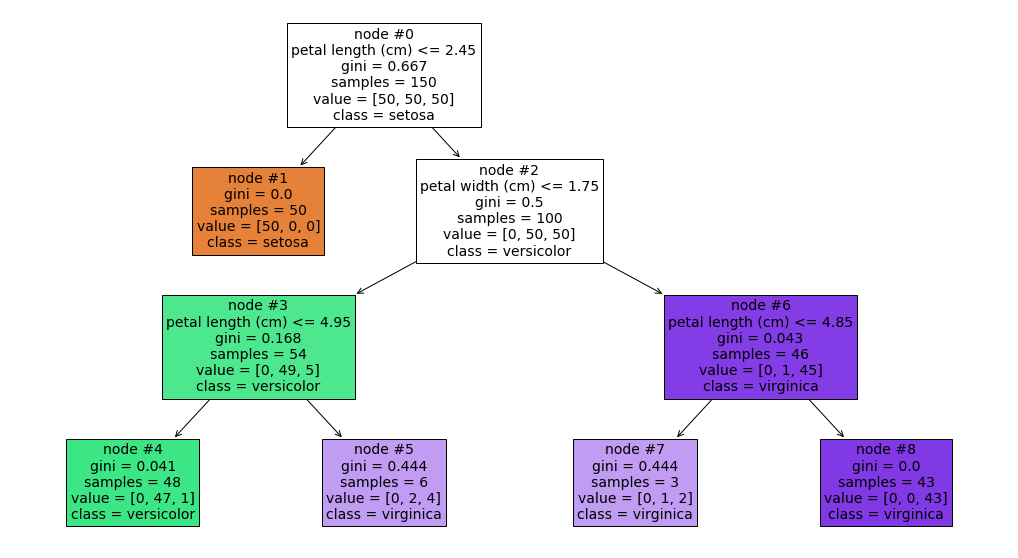

In [11]:
plt.figure(figsize=(18,10))
plot_tree(tree_clf,max_depth=3,feature_names=X.columns,fontsize=14,filled=True,node_ids=True,
          class_names=['setosa', 'versicolor', 'virginica'])
plt.show()

<h3>Making Predictions</h3>

Let's discuss how the decision tree above decides on the type of plant based on the four measurements. One starts at the root node, or node #0. On the first node we are asked if the <b> petal width</b> is smaller or equal to 2.45cm. In case the petal length is smaller than 2.45 cm, then we have to move one step down to the left node (node #1). In this case since this node is a <i> leaf node</i> (that is, it is the end of the path) the decision tree will ask no more questions, but will simply look at the predicted class for that node (say by majority). In this case, it will automatically classifies that plant as <b> setosa</b>. In this (somewhat rare case) all the plants (out of these 150 training data) that have a petal length <=2.45 cm are setosa.

On the other hand, if you have another flower with a petal length of greater than 2.45 cm, then you have to go to the child node on the right (node #3). At this node, the decision tree asks you if the plant has a petal width less than 1.75 cm or not. Depending on the answer, you either move downwards to the root child on the left or on the right. You continue this way until you reach a leaf node (nodes #4, 5, 7 or 8). Suppose you end up on node #5. Then the decision tree will check the predicted class for node #7 and since there are 0 setosa, 2 veriscolor, and 4 virginica, by majority voting it will classify the plant as belonging to the virginica class. 


As we can see, Decision Trees are great for interpretability purposes, which is one of their major advantages along with the fact that we can easily visualize them as well. 

<h4> Description of Parameters</h4>

We will briefly describe what each of the parameters that appear in the tree plot above mean, though they may be quite self-explanatory.

<ul>
    <li><b>Samples:</b> this counts the number of training samples the particular attribute applies at that particular nodde. For example, focusing on node #6 above, 46 samples have a $petal\_length \leq 4.85cm$.</li>
    <li><b>Value:</b> refers to the number of trainin instances in each class that the particular node applies to. For example, let's focus on node #3. This particular node applies to 0 setosa, 49 versicolor, and 5 virginca. </li>
    <li> <b> Gini:</b> Measures a node's impurity. The closer the gini factor is to zero, we say the more pure that node is. In other words, that node is predominantly occupied by members of one class. If gini is exactly zero, that means that particular node is pure; that is, it consists entirely of members of as ingle class. For example node #1 and node #8 are pure nodes, as they contain entirely members of as ingle plant group. Gini factor at node $i$, $G_i$ is computed as follows: $$G_i=1-\sum_{k=1}^np_{i,k}^2=\sum_{k=1}^np_{i,k}(1-p_{i,k})$$
        where $p_{i,k}$ is the proportion of training instances of class $k$ in node $i$. </li>
    
  <li><b>Entropy:</b> is another way of measuring node ipurity; that is, entropy will be exactly zero if the node contains samples of only one class. $$H_i=-\sum_{k=1\\ p_{i,k}\neq 0}^np_{i,k}\log_2(p_i,k)$$
    
  where, as before, $p_{i,k}$ represents the ratio of training instances of class $k$ in node $i$.</li>
    
  </ul>
  
We will see later on, that one may use gini factor to perform feature selection.

<h4> Returning Probabilities</h4>

Instead of returning the predicted class, as we have previously seen with other models, decision trees can also return the probability that a particular plant (in this case) belongs to a certain class. Taking the two examples above. In the case of a plant with petal length <=2.45 cm, the decision tree would return a probability vector [1,0,0] since if we look at that particular class we have 50 plants from setosa and 0 from the other categories. So, the ratio is 50/(50+0+0)=1, and similarly for the other two classes.

Suppose we end up on the leaf node #5. Then the decision tree will return the probability vector [0,1/3,2/3]. That is, a plant with petal width<=1.75 cm and 2.45cm<=petal length<4.95cm has a probability of 0 of belonging to the setosa class, a probability of 0.33 of belonging to the veriscolor class, and a probability of .67 of belonging to the virginica class.

<h3>Visualizing Decision Boundaries</h3>

We will only use <b>petal length</b> and <b> petal width</b>(since these seem to be the two most important features) to try and visualize the decision boundary.

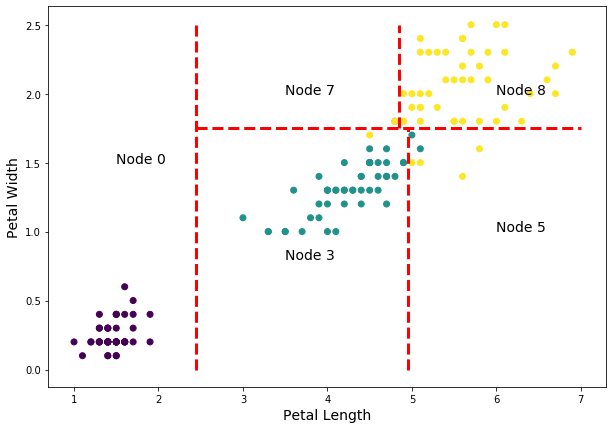

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(X['petal length (cm)'],X['petal width (cm)'],c=y)
plt.xlabel('Petal Length',fontsize=14)
plt.ylabel("Petal Width",fontsize=14)

plt.plot([2.45,2.45],[0,2.5], 'r--',lw=3)
plt.text(1.5,1.5,'Node 0',fontsize=14)

plt.plot([2.45,7],[1.75,1.75], 'r--',lw=3)
plt.text(3.5,.8, 'Node 3',fontsize=14)
plt.plot([4.95,4.95],[0,1.75], 'r--',lw=3)
plt.text(6,1,'Node 5',fontsize=14)
plt.plot([4.85,4.85],[1.75,2.5],'r--',lw=3)
plt.text(6,2,'Node 8',fontsize=14)
plt.text(3.5,2,'Node 7',fontsize=14)
plt.show()

One thing to observe is that decision trees perform a linear decomposition of the space. That is, all the decision boundaries are lines. We can already see that whenever two or more classes are close together and there is mixture, lines simply dont do a great job in dividing the classes. 

<h3>Growing a Classification Tree</h3>

An important question to answer is how exactly are these trees generated? Specifically, how does the algorith at each node decide to pick a certain feature and a value to do the splitting on? For example, how did the decision tree classifier decide at node #3 to pick <b> petal length</b> (out of the four features in this case), and then in addition to the feature, how did it decide to pick the value of $4.95$ to do the splitting on? 

This process is known as <b> tree growing</b> and is what we shall discuss next in a bit more details. 

The <b> growing tree</b> algorithm is often known as the Classification and Regression Tree Algorithm (CART Algorighm).

The algorithm works as follows:

First, it splits the training set into two subsets using a certain feature $x$ and a threshold $t_x$ (e.g. $x=petal\_ length$ and $t_x=4.95 cm$). So the big question is how does the algorithm choose $x$ and $t_x$? There are a few ways it may do so, but they all rely on the same principles. The algorithm searches for the pair $(x,t_x)$ that results in the purest subsets, weighted by their relative sizes, on the next stage. Specifically, the algorithm searches for the pair $(x,t_x)$ that minimizes the following cost function (or any equivalent cost function):

$$J(x,t_x)=\frac{m_l}{m}G_l+\frac{m_r}{m}G_r$$

where $G_l,G_r$ are the Gini factors for the left and right nodes respectively (note that other measures may be used instead of the Gini factor as well, such as Entropy), and $m_l,m_r$ represent the number of the training samples in the left and right nodes respectively, while $m$ represents the total number of training samples.

The CART Algorithm is a top-down <b>greedy algorithm</b>. That basically means that it searches for an optimum split at each particular level, but does not check further down to see if the current split will result in the overall lowest impurity further down. 

<h3>Regression Setting</h3>

The underlying mechanism for decision trees is similar for both regression and classification problems. There are two main differences: How the predictions are made and how the trees are grown. 

We'll illustrate these via an example, similar to what we did in the classification setting. We'll use the <b> insurance</b> dataset that we had for our first project. We'll use the same set when discussing more complex tree based models such as Random Forests, in doing so we can also compare the performance of different models. 

In [45]:
Y=f(X)

x_0

D, X_1, X_2, X_3

Y_1=f_1(X_1)

Y_2=f_2(X_2)

Y_3=f_3(X_3)

f_1(x_0)=9K

f_2(x_0)=10K

f_3(x_0)=11K

NameError: name 'f' is not defined

In [19]:
insurance=pd.read_csv('insurance_train.csv')

In [20]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,52.0,female,24.130,1,yes,northwest,23887.66270
1,46.0,male,43.890,3,no,southeast,8944.11510
2,46.0,male,19.855,0,no,northwest,7526.70645
3,37.0,female,NaN,2,no,southwest,6311.95200
4,62.0,female,29.920,0,no,southeast,13457.96080


For the purpose of this illustration, we will drop all rows with missing values. We'll also carry out the standard preprocessing steps, such as converting qualitative features to dummy variabes, scaling etc.

In [21]:
insurance.dropna(inplace=True)

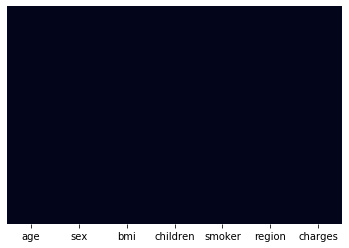

In [22]:
sns.heatmap(insurance.isnull()==True,cbar=False, yticklabels=False)

In [23]:
insurance.shape

(871, 7)

In [24]:
X_reg=insurance.drop('charges',axis=1)
y_reg=insurance['charges']

In [25]:
X_reg.head()

,age,sex,bmi,children,smoker,region
0,52.0,female,24.130,1,yes,northwest
1,46.0,male,43.890,3,no,southeast
2,46.0,male,19.855,0,no,northwest
4,62.0,female,29.920,0,no,southeast
6,27.0,male,31.130,1,yes,southeast


In [26]:
#Convert qualitative variables using dummy variables 
cols=['sex','smoker','region']
X_reg=pd.get_dummies(data=X_reg,columns=cols,drop_first=True)

In [27]:
X_reg.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,52.0,24.130,1,0,1,1,0,0
1,46.0,43.890,3,1,0,0,1,0
2,46.0,19.855,0,1,0,1,0,0
4,62.0,29.920,0,0,0,0,1,0
6,27.0,31.130,1,1,1,0,1,0


Now that we have performed all the necessary preprocessing steps, we'll go ahead and fit a Decision Tree Regressor and plot the tree. Then, we'll discuss how the algorithm is making predictions and how does the tree grow. At this stage we will not try to evaluate the performance of the model, but simply illustrate its procedure. 

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
tree_reg=DecisionTreeRegressor(max_depth=3, criterion='mse')

In [42]:
tree_reg.fit(X_reg,y_reg)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

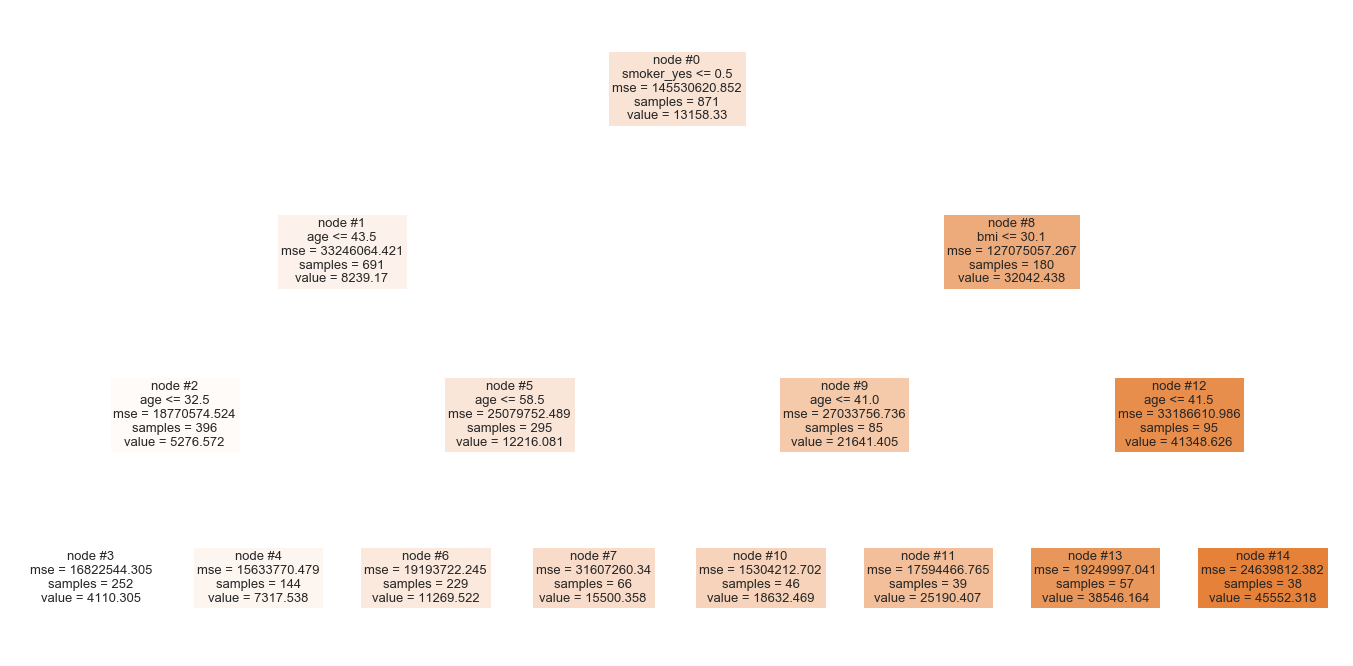

In [43]:
plt.figure(figsize=(24,12))
plot_tree(tree_reg,max_depth=3,feature_names=X_reg.columns,fontsize=13,filled=True,node_ids=True)
plt.show()

As you can see, the regression and classification trees look very similar. One of the things they differ on is how they make final predictions.

<h3>Making Predictions with Regression Trees</h3>

So how does a regression tree make predictions? Suppose we have a new person, Anna, with the following features: she is not a smoker, she has a bmi of 35.4 and is 37 years old. With these features, how much will our model predict that the insurance company will charge Anna?

Well, we have to start at the top of the tree, node #0 and move down the tree. Since Anna is not a smoker, we move from node #0 to the right, down to node #8. Since Anna has a bmi>30.1 we move to the right again down to node #12. Since Anna is 37 years old< 41.5 we move to the lef, down to node #13. Now, there are 57 individuals in our training set that are non-smokers, have a bmi>30.1 and are under 41.5 years old. What our decision tree will do, is simply take the average of the insurance charges of these 57 people and output that as a prediction for Anna. In the node, this is indicated by the parameter <b> value</b>. So, in this case the regression tree will predict an insurance charge of $\$38546.164$ for Anna.

<h3>Growing Regression Trees</h3>

The way a regression tree is grown is very similar to how a classification tree is grown, with the only differnce being the type of loss function that is optimized at each split.

Specifically, now each split is made with the goal of trying to minimize the RSS/MSE at the following stage, instead of the node impurity, as was the case in the classification setting. That is, the algorithm picks the feature $x$ and the split value $t_x$, such that the pair $(x,t_x)$ minimizes the loss function:

$$J(x,t_x)=\frac{m_l}{m}RSS_l+\frac{m_r}{m}RSS_r$$ $RSS_l$ and $RSS_r$ are for the left and right nodes, respectively. Recall, $$RSS_{node}=\sum_{i\in node}\left(\hat{y}_{node}-y^{(i)}\right)^2, \,\text{ and }\, \hat{y}_{node}=\frac{1}{m_{node}}\sum_{i\in node}y^{(i)}$$

In plain words, the pair $(x,t_x)$ minimizes the weighted sum of the respective Mean Square Errors of the nodes resulting from the split. 

One may use other metrics, as well. 

<h3>Feature Importance</h3>

One may use, to some extent and with reservations, decision trees to identify some of the most important features, or better said, features that are relied upon the most by the algorithm in making predictions. For example, for the insurance dataset, it appears that whether a person is a smoker or not, his/her age and bmi are the top three features that the decision tree algorithm relies the most upon when making predictions. 

We will revisit this topic when we discuss Random Forests, and discuss a few ways to get around some of the immediate issues that come out of decision trees. 

<h3>Bias-Variance Trade-Off in Decision Trees</h3>

Bias-variance trade-off is present in every machine-learning algorithm. When it comes to the decision trees, one of the parameters that plays an important role in the bias-variance trade-off, is the <b>max_depth</b> parameter. In other words, how deep you grow your tree affects the bias-variance trade-off. Specifically, the deeper you grow your tree the more likely you are to overfit your data, and thus create a model that has a high variance and relatively low bias, and vice versa. There are other parameters that play an important role in this issue, but we'll discuss them later when we talk about ensamble models such as Random Forests.

<h3> Issues with Decision Trees</h3>

As we have seen, decision trees have many advantages, such as their great interpretability feature, the ability to present them visually etc. However, they do suffer from a major drawback. They are higly variable and typically result in relatively poor predictions. We will demonstrate the high variabilit of decision trees below. 

Since it is similar for both cases, we will focus on regression trees. 


<h3> Model Variablity</h3>

We'll use cross-validation to get an idea of the variability of the model as a function of the max_depth.


In [32]:
from sklearn.model_selection import cross_validate, KFold

In [50]:
kf=KFold(n_splits=10,shuffle=True, random_state=43)
depth={}
for i in range(2,11):
    reg_csv=cross_validate(DecisionTreeRegressor(max_depth=i),X_reg,y_reg, return_estimator=True,cv=kf,
                          scoring=['r2','neg_mean_squared_error'])
    depth['depth_'+str(i)]=reg_csv['test_r2']

In [51]:
df=pd.DataFrame(depth)

In [52]:
df

,depth_2,depth_3,depth_4,depth_5,depth_6,depth_7,depth_8,depth_9,depth_10
0,0.867100,0.902718,0.897770,0.896355,0.900892,0.898595,0.863017,0.817965,0.782125
1,0.817817,0.858249,0.839961,0.794828,0.793519,0.755185,0.702722,0.664460,0.654640
2,0.708349,0.743134,0.732879,0.736753,0.734502,0.632549,0.612936,0.631409,0.630105
3,0.782335,0.812197,0.814265,0.788150,0.773603,0.748645,0.730257,0.735398,0.707057
4,0.864714,0.880607,0.891512,0.896591,0.905270,0.879554,0.846320,0.847963,0.831030
5,0.833932,0.853788,0.854617,0.858283,0.840023,0.803568,0.793193,0.790632,0.783807
6,0.848745,0.863409,0.871034,0.887075,0.884398,0.872339,0.853761,0.856510,0.857136
7,0.940497,0.963922,0.968856,0.915779,0.919237,0.898408,0.881197,0.869844,0.831792
8,0.782035,0.780946,0.794439,0.770990,0.746964,0.665770,0.701479,0.716608,0.676512
9,0.805055,0.853803,0.850134,0.835800,0.818771,0.709855,0.655804,0.612929,0.627705


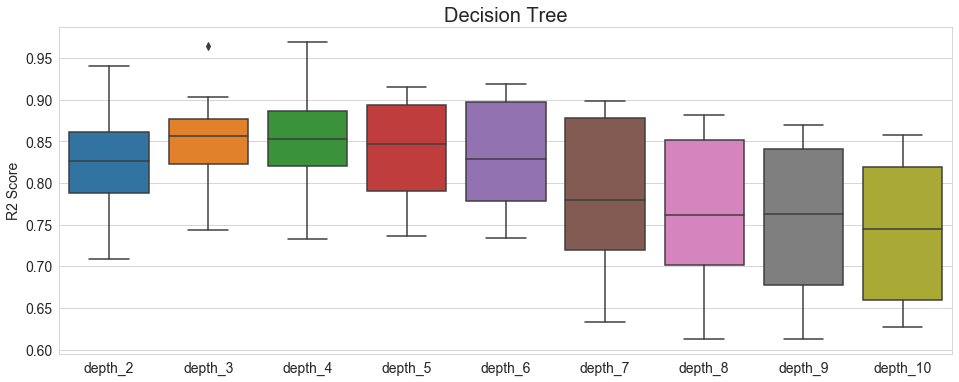

In [53]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))
plt.xticks(fontsize=14)
plt.yticks(np.arange(0.45,0.98,0.05),fontsize=14)
plt.ylabel("R2 Score",fontsize=14)
plt.title("Decision Tree",fontsize=20)
sns.boxplot(data=df)
plt.show()

It is clear from the plot above that the models variability increases significantly the deeper you grow a tree. From the plot, we see that a depth of 3 appears to result in the lowest variance and highest mean. 

<font size=5 color='red'>Exercise</font>

Use the airline dataset from Project 2, to build a classification model using decision trees. Check the variability of the model and how the accuracy and recall scores compare to what you got on the project.

You may use only a subset of the dataset for computational reasons